## $\Delta$Q Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [4]:
data = pd.read_csv('../data/2018-04-12_batch8_CH29.csv')
cycles = data.groupby('Cycle_Index')
cycle_dict = {}

for i in cycles:
    cycle_dict[i[0]] = i[1]

In [5]:
cycle_dict[11].head()

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature,Aux_Voltage
10368,10368,131908.0744,1.523715e+09,0.0673,3,11,0.549515,2.126527,0.000003,2.764386e-07,0.000007,5.809909e-07,0.017381,0.015466,35.310373,NaN
10369,10369,131908.0987,1.523715e+09,0.0916,3,11,0.858246,2.149167,0.000003,2.764386e-07,0.000007,5.809909e-07,0.017381,0.015466,35.310024,NaN
10370,10370,131908.1284,1.523715e+09,0.1213,3,11,1.165848,2.177527,0.000003,2.764386e-07,0.000007,5.809909e-07,0.017381,0.015466,35.309598,NaN
10371,10371,131908.1611,1.523715e+09,0.1540,3,11,1.472210,2.210412,0.000003,2.764386e-07,0.000007,5.809909e-07,0.017381,0.015466,35.309129,NaN
10372,10372,131908.1948,1.523715e+09,0.1877,3,11,1.905315,2.262209,0.000003,2.764386e-07,0.000007,5.809909e-07,0.017381,0.015466,35.308646,NaN


Text(0.5, 0, 'Time')

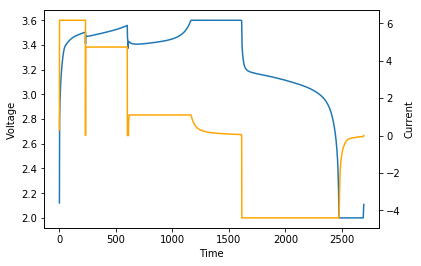

In [6]:
fig = plt.figure()

cycle_number = 100

ax = fig.add_subplot(111)
ax.plot(cycle_dict[cycle_number]['Test_Time'] - cycle_dict[cycle_number]['Test_Time'].iloc[0], cycle_dict[cycle_number]['Voltage'])
ax1 = ax.twinx()
ax1.plot(cycle_dict[cycle_number]['Test_Time'] - cycle_dict[cycle_number]['Test_Time'].iloc[0], cycle_dict[cycle_number]['Current'], color = 'orange')

ax.set_ylabel('Voltage')
ax1.set_ylabel('Current')
ax.set_xlabel('Time')

In [63]:
discharge_100 = cycle_dict[100][cycle_dict[100]['Step_Index'] == 10]['Current']
discharge_10 = cycle_dict[10][cycle_dict[10]['Step_Index'] == 10]

In [65]:
discharge_100.head()

,Data_Point,Test_Time,DateTime,Step_Time,Step_Index,Cycle_Index,Current,Voltage,Charge_Capacity,Discharge_Capacity,Charge_Energy,Discharge_Energy,dV/dt,Internal_Resistance,Temperature,Aux_Voltage
77952,77952,376954.3609,1.523960e+09,0.0940,10,100,-0.572170,3.585062,1.070542,0.000003,3.706523,0.00001,-0.000596,0.015513,32.161747,NaN
77953,77953,376954.4251,1.523960e+09,0.1582,10,100,-1.056516,3.574974,1.070542,0.000003,3.706523,0.00001,-0.000596,0.015513,32.163008,NaN
77954,77954,376954.4900,1.523960e+09,0.2231,10,100,-1.584908,3.563468,1.070542,0.000003,3.706523,0.00001,-0.000596,0.015513,32.164283,NaN
77955,77955,376954.5556,1.523960e+09,0.2887,10,100,-2.112418,3.551151,1.070542,0.000003,3.706523,0.00001,-0.000596,0.015513,32.165572,NaN
77956,77956,376954.6212,1.523960e+09,0.3543,10,100,-2.597128,3.539590,1.070542,0.000003,3.706523,0.00001,-0.000596,0.015513,32.166861,NaN


In [71]:
discharge_100 = cycle_dict[100][cycle_dict[100]['Step_Index'] == 10][
    cycle_dict[100][cycle_dict[100]['Step_Index'] == 10]['Current'] < -4.3]
discharge_10 = cycle_dict[10][cycle_dict[10]['Step_Index'] == 10][
    cycle_dict[10][cycle_dict[10]['Step_Index'] == 10]['Current'] < -4.3]

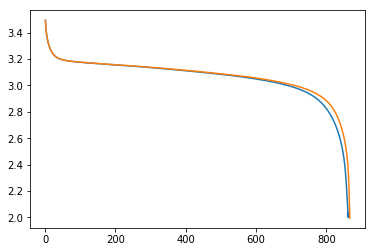

In [74]:
plt.plot(discharge_100['Step_Time'], discharge_100['Voltage'])
plt.plot(discharge_10['Step_Time'], discharge_10['Voltage'])

In [96]:
discharge_100['Voltage_rounded'] = round(discharge_100['Voltage'], ndigits=3)
discharge_10['Voltage_rounded'] = round(discharge_10['Voltage'], ndigits=3)

In [101]:
scipy.__version__

'1.2.1'

In [104]:
from scipy.interpolate import BSpline as bs

In [107]:
from scipy import interpolate

In [113]:
len(discharge_100)

267

In [114]:
len(discharge_100['Discharge_Capacity'].unique())

222

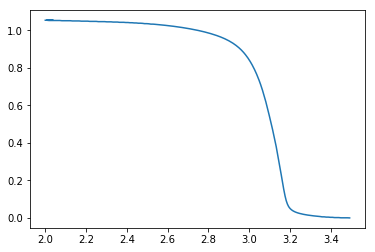

In [123]:
plt.plot(x,y)

In [173]:
sorted_discharge_100 = discharge_100.sort_values(by=['Voltage'])
sorted_discharge_10 = discharge_10.sort_values(by=['Voltage'])

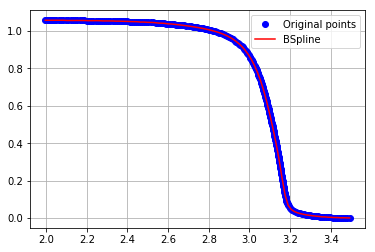

In [174]:
x = np.array(sorted_discharge_10['Voltage'])
y = np.array(sorted_discharge_10['Discharge_Capacity'])

t, c, k = interpolate.splrep(x, y, s=0, k=3)
# print('''\
# t: {}
# c: {}
# k: {}
# '''.format(t, c, k))
N = 100
xmin, xmax = x.min(), x.max()
xx = np.linspace(xmin, xmax, N)
spline = interpolate.BSpline(t, c, k, extrapolate=False)

plt.plot(x, y, 'bo', label='Original points')
plt.plot(xx, spline(xx), 'r', label='BSpline')
plt.grid()
plt.legend(loc='best')
plt.show()

In [177]:
x_dc_100 = discharge_100['Voltage'].unique()

In [179]:
capacity_splined_10 = spline(x_dc_100)

In [183]:
Q = capacity_splined_10 - discharge_100['Discharge_Capacity']

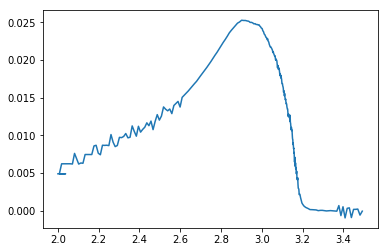

In [184]:
plt.plot(x_dc_100, Q)

In [209]:
def q_finder(dc10, dc100):
    """
    This function requires the input of two discharge curves (in the form of Pandas DataFrames) and finds the
    capacity difference as a function of voltage
    """
    
    from scipy.interpolate import BSpline as bs
    import numpy as nppl
    import pandas as pd
    
    return_df = pd.DataFrame()
    sorted_discharge_100 = dc100.sort_values(by=['Voltage'])
    sorted_discharge_10 = dc10.sort_values(by=['Voltage'])
    
    x = np.array(sorted_discharge_10['Voltage'])
    y = np.array(sorted_discharge_10['Discharge_Capacity'])

    t, c, k = interpolate.splrep(x, y, s=0, k=3)
    N = 100
    xmin, xmax = x.min(), x.max()
    x_dc_100 = dc100['Voltage'].unique()
    spline = interpolate.BSpline(t, c, k, extrapolate=False)
    capacity_splined_10 = spline(x_dc_100)
    Q = capacity_splined_10 - dc100['Discharge_Capacity']
    
    return_df['Q'] = -Q.reset_index()['Discharge_Capacity']
    return_df['V'] = dc100.reset_index()['Voltage']
    return return_df

In [210]:
q = q_finder(discharge_10, discharge_100)

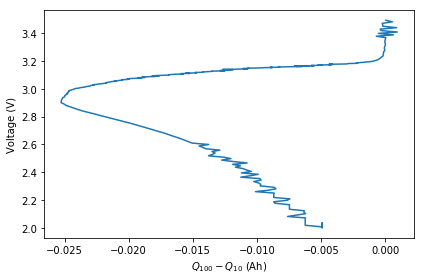

In [218]:
plt.plot(q['Q'], q['V'])
plt.xlabel(r'$Q_{100} - Q_{10}$ (Ah)')
plt.ylabel('Voltage (V)')

plt.tight_layout()